In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use("ggplot")
%matplotlib inline
from sklearn.datasets import make_blobs

In [2]:
np.random.seed(0)

In [3]:
def gen_pol_points(n,r=1,eps=1e-7):
    r_rands=np.random.uniform(eps,1,(n,1))
    rad_rands=np.random.uniform(0,2*np.pi,(n,1))
    x=r_rands*np.cos(rad_rands);y=r_rands*np.sin(rad_rands)
    return np.hstack([x,y])

In [4]:
class get_params(object):
    def __init__(self):
        self.__rot=np.array([[np.cos(np.pi/2),-np.sin(np.pi/2)],
                           [np.sin(np.pi/2), np.cos(np.pi/2)]])
    def __call__(self,points):
        w=self.__rot.dot(points.T).T
        return w/np.linalg.norm(w,axis=1).reshape(-1,1)
get_w=get_params()

In [5]:
n_models=2000
points=gen_pol_points(n_models)
W=get_w(points)
U=np.random.randint(0,2,size=(n_models,))*2-1
B=np.random.uniform(-1,1,size=(n_models,))

In [6]:
X,y=make_blobs(n_samples=1000,n_features=2,centers=[(1,1),(-1,-1)],cluster_std=0.2)
y=y.reshape(-1,1)*2-1

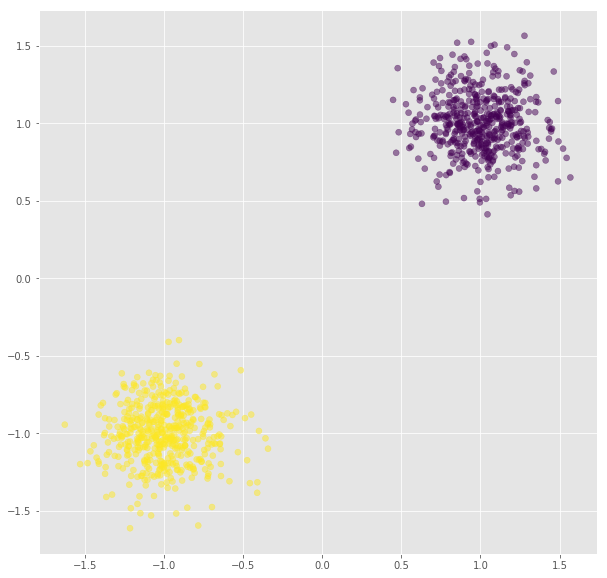

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=y.flatten(),alpha=0.5)

In [8]:
def pred_prob(X,w,u,b,eps=0.1):
    E=np.ones((X.shape[0],1))*eps
    hard=np.float64(X.dot(w)*u+b>0)
    return (1-E)*hard+(1-hard)*E
def likelihood_prob(X,y,w,u,b,eps=0.1):
    E=np.ones((X.shape[0],1))*eps
    hard=np.float64(y*((X.dot(w))*u+b)>0)
    return np.prod((1-E)*hard+(1-hard)*E)

In [9]:
likelihoods=np.array([likelihood_prob(X,y,w_i.reshape(-1,1),u_i,b_i,0.1) for w_i,u_i,b_i in zip(W,U,B)])

In [10]:
W_valid=W[likelihoods>0]
U_valid=U[likelihoods>0]
B_valid=B[likelihoods>0]

In [11]:
x_lin=np.linspace(-2,2,100)
x1,x2=np.meshgrid(x_lin,x_lin)

In [12]:
X_grid=np.concatenate([x1.reshape(-1,1),x2.reshape(-1,1)],axis=1)

In [13]:
y_pred=np.mean(np.concatenate([pred_prob(X_grid,w.reshape(-1,1),u,b,0.1) for w,u,b in zip(W_valid,U_valid,B_valid)],axis=1),
               axis=1)

Text(0, 0.5, '$x_2$')

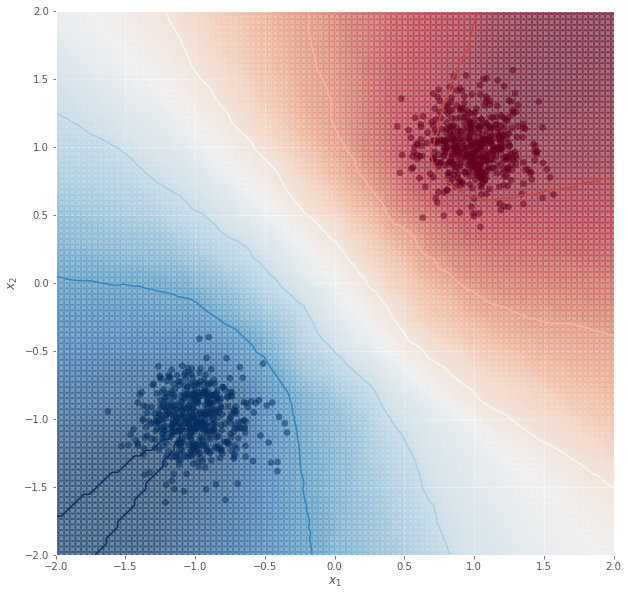

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(X_grid[:,0],X_grid[:,1],c=y_pred.flatten(),alpha=0.5,cmap=cm.RdBu,s=50)
Z=y_pred.reshape(x1.shape)
plt.contour(x1,x2,Z, cmap=plt.cm.RdBu, alpha=1)
plt.scatter(X[:,0],X[:,1],c=y.flatten(),alpha=0.5,cmap=cm.RdBu)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")